# Machine Learning based Multivariate Time Series Forecasting of ISO New England Electricity Demand

# Implementation of Machine Learning Algorithm

1- Random Forest

2- CatBoost

3- XGBoost

4- Prophet 


**Stationarity Check**

In [1]:
import pandas as pd
import numpy as np

In [2]:
ME_zone = pd.read_csv("weather.csv")

In [3]:
ME_zone.head()

,date,pollution_today,Humidity,Temperature,press,Wind,snow,rain,pollution_yesterday
0,1/2/2010,145.958333,-8.500000,-5.125000,1024.750000,24.860000,0.708333,0.0,10.041667
1,1/3/2010,78.833333,-10.125000,-8.541667,1022.791667,70.937917,14.166667,0.0,145.958333
2,1/4/2010,31.333333,-20.875000,-11.500000,1029.291667,111.160833,0.000000,0.0,78.833333
3,1/5/2010,42.458333,-24.583333,-14.458333,1033.625000,56.920000,0.000000,0.0,31.333333
4,1/6/2010,56.416667,-23.708333,-12.541667,1033.750000,18.511667,0.000000,0.0,42.458333


In [4]:
from statsmodels.tsa.stattools import adfuller
ME_zone = pd.read_csv("weather.csv")

# ADF test for 'demand' column
demand_adf = adfuller(ME_zone['Wind'])
print("ADF test for 'demand' column:")
print(f"ADF Statistic: {demand_adf[0]:.4f}")
print(f"p-value: {demand_adf[1]:.4f}")
print("Critical Values:")
for key, value in demand_adf[4].items():
    print(f"   {key}: {value:.4f}")
    
# ADF test for 'drybulb' column
drybulb_adf = adfuller(ME_zone['Temperature'])
print("\nADF test for 'drybulb' column:")
print(f"ADF Statistic: {drybulb_adf[0]:.4f}")
print(f"p-value: {drybulb_adf[1]:.4f}")
print("Critical Values:")
for key, value in drybulb_adf[4].items():
    print(f"   {key}: {value:.4f}")
    
# ADF test for 'dewpnt' column
dewpnt_adf = adfuller(ME_zone['Humidity'])
print("\nADF test for 'dewpnt' column:")
print(f"ADF Statistic: {dewpnt_adf[0]:.4f}")
print(f"p-value: {dewpnt_adf[1]:.4f}")
print("Critical Values:")
for key, value in dewpnt_adf[4].items():
    print(f"   {key}: {value:.4f}")



ADF test for 'demand' column:
ADF Statistic: -8.6222
p-value: 0.0000
Critical Values:
   1%: -3.4349
   5%: -2.8635
   10%: -2.5678

ADF test for 'drybulb' column:
ADF Statistic: -2.1543
p-value: 0.2232
Critical Values:
   1%: -3.4349
   5%: -2.8635
   10%: -2.5678

ADF test for 'dewpnt' column:
ADF Statistic: -1.9100
p-value: 0.3274
Critical Values:
   1%: -3.4349
   5%: -2.8635
   10%: -2.5678


# 1- Random Forest

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('weather.csv', index_col='date', parse_dates=True)
df = df[['Wind', 'Temperature','Humidity']]

# Create a lagged version of the demand variable to use as features
df['Wind_lagged'] = df['Wind'].shift()

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Split the training and testing sets into features and target variables
train_X, train_y = train[['Wind_lagged', 'Temperature', 'Humidity']], train['Wind']
test_X, test_y = test[['Wind_lagged', 'Temperature', 'Humidity']], test['Wind']

In [6]:
# Fit a Random Forest model to the training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)


In [7]:
train_X = train_X.fillna(1)

In [8]:
rf_model.fit(train_X, train_y)


RandomForestRegressor(random_state=0)

In [9]:
# Make predictions on the test data
predictions = rf_model.predict(test_X)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(test_y, predictions)
print('Mean Squared Error:', mse)

Mean Squared Error: 1149.2712299725413


**Model Evaluation**

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate the mean squared error of the predictions
mse = mean_squared_error(test_y, predictions)
print('Mean Squared Error:', mse)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error
mae = mean_absolute_error(test_y, predictions)
print('Mean Absolute Error:', mae)

# Calculate the R2 score
r2 = r2_score(test_y, predictions)
print('R2 Score:', r2)

Mean Squared Error: 1149.2712299725413
Root Mean Squared Error: 33.90090308491119
Mean Absolute Error: 18.414128554330546
R2 Score: 0.31314297234753063


**Visualization(s)**

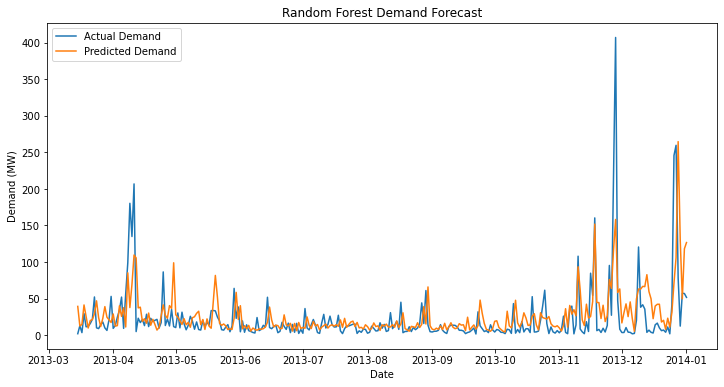

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Create a line plot of actual demand values vs predicted values
plt.plot(test.index, test_y, label='Actual Demand')
plt.plot(test.index, predictions, label='Predicted Demand')

plt.xlabel('Date')
plt.ylabel('Demand (MW)')
plt.title('Random Forest Demand Forecast')
plt.legend()
plt.show()


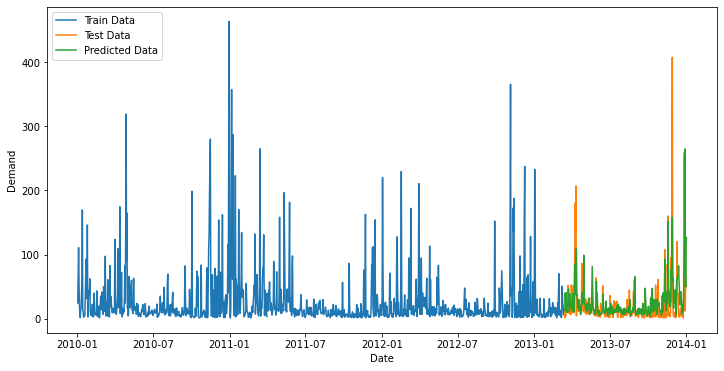

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot the actual values, training predictions, and testing predictions
plt.plot(train_y.index, train_y, label='Train Data')
plt.plot(test_y.index, test_y, label='Test Data')
plt.plot(test_y.index, predictions, label='Predicted Data')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.show()

# CATBOOST Algorithm

In [13]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split



In [14]:
# Load the data
# Load the data
df = pd.read_csv('weather.csv', index_col='date', parse_dates=True)
df = df[['Wind', 'Temperature','Humidity']]



In [15]:
# Create a lagged version of the demand variable to use as features
df['Wind_lagged'] = df['Wind'].shift()



In [16]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]



In [17]:

# Split the training and testing sets into features and target variables
train_X, train_y = train[['Wind_lagged', 'Temperature', 'Humidity']], train['Wind']
test_X, test_y = test[['Wind_lagged', 'Temperature', 'Humidity']], test['Wind']



In [18]:
# Fill missing values in the training and testing data
train_X = train_X.fillna(1)
test_X = test_X.fillna(1)



In [19]:
from catboost import CatBoostRegressor, Pool

# Convert the data into CatBoost's Pool format
train_pool = Pool(train_X, train_y)
test_pool = Pool(test_X, test_y)



In [20]:
# Define the CatBoost model
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_seed=0)



In [21]:
# Fit the model to the training data
catboost_model.fit(train_pool)



0:	learn: 41.6363860	total: 151ms	remaining: 15s
1:	learn: 40.7970992	total: 156ms	remaining: 7.64s
2:	learn: 40.0036004	total: 160ms	remaining: 5.18s
3:	learn: 39.2777007	total: 165ms	remaining: 3.95s
4:	learn: 38.7705849	total: 168ms	remaining: 3.2s
5:	learn: 38.1693776	total: 173ms	remaining: 2.7s
6:	learn: 37.6604565	total: 177ms	remaining: 2.35s
7:	learn: 37.1193308	total: 181ms	remaining: 2.08s
8:	learn: 36.6652412	total: 185ms	remaining: 1.87s
9:	learn: 36.1908463	total: 188ms	remaining: 1.69s
10:	learn: 35.8679792	total: 190ms	remaining: 1.53s
11:	learn: 35.5332584	total: 191ms	remaining: 1.4s
12:	learn: 35.2265446	total: 193ms	remaining: 1.29s
13:	learn: 34.9503025	total: 194ms	remaining: 1.19s
14:	learn: 34.6481979	total: 196ms	remaining: 1.11s
15:	learn: 34.4236588	total: 198ms	remaining: 1.04s
16:	learn: 34.1882688	total: 199ms	remaining: 972ms
17:	learn: 33.9320746	total: 201ms	remaining: 914ms
18:	learn: 33.8117083	total: 202ms	remaining: 862ms
19:	learn: 33.6301285	total

In [22]:
# Make predictions on the test data
predictions = catboost_model.predict(test_pool)



**Model Evaluation**

In [23]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(test_y, predictions)
print('Mean Squared Error:', mse)

# Calculate the root mean squared error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Calculate the mean absolute error
mae = mean_absolute_error(test_y, predictions)
print('Mean Absolute Error:', mae)

# Calculate the R2 score
r2 = r2_score(test_y, predictions)
print('R2 Score:', r2)


Mean Squared Error: 1158.7079018094475
Root Mean Squared Error: 34.039798792141056
Mean Absolute Error: 17.786312484831484
R2 Score: 0.3075031858464937


**Visualization(s)**

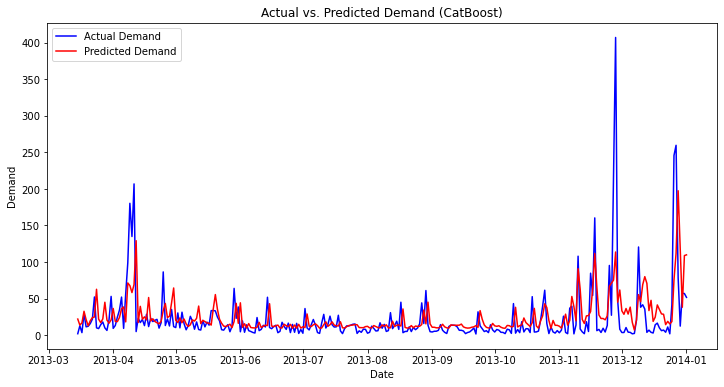

In [24]:
import matplotlib.pyplot as plt

# Plot the actual vs. predicted demand values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test_y, label='Actual Demand', color='blue')
plt.plot(test.index, predictions, label='Predicted Demand', color='red')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Actual vs. Predicted Demand (CatBoost)')
plt.legend()
plt.show()


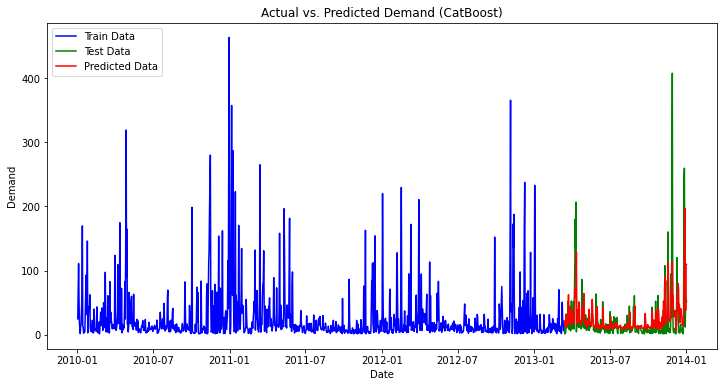

In [25]:
# Make predictions on the training and test sets
train_predictions = catboost_model.predict(train_pool)
test_predictions = catboost_model.predict(test_pool)

# Plot the actual values, training predictions, and testing predictions
plt.figure(figsize=(12, 6))
plt.plot(train_y.index, train_y, label='Train Data', color='blue')
plt.plot(test_y.index, test_y, label='Test Data', color='green')
plt.plot(test_y.index, test_predictions, label='Predicted Data', color='red')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.title('Actual vs. Predicted Demand (CatBoost)')
plt.show()

# 03- XGBoost

In [26]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt




In [27]:
# Fill missing values with 1 (alternatively, you can use other methods to handle missing values)
train_X = train_X.fillna(1)
test_X = test_X.fillna(1)



In [28]:
# Train the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
xgb_model.fit(train_X, train_y)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [29]:
# Make predictions on the test data
predictions = xgb_model.predict(test_X)

# Calculate the evaluation metrics
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, predictions)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)
print('R-squared (R2):', r2)

Mean Squared Error: 1278.2517823425105
Mean Absolute Error: 18.25210858867453
Root Mean Squared Error: 35.75264720747976
R-squared (R2): 0.2360582977160014


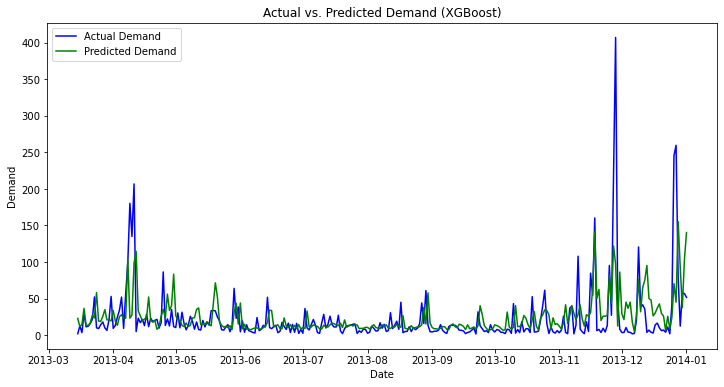

In [30]:
# Plot the actual values and the predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_y.index, test_y, label='Actual Demand', color='blue')
plt.plot(test_y.index, predictions, label='Predicted Demand', color='green')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Actual vs. Predicted Demand (XGBoost)')
plt.legend()
plt.show()

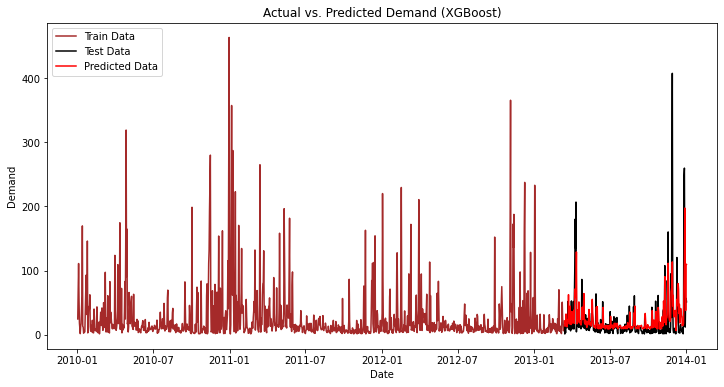

In [31]:
# Plot the actual values, training predictions, and testing predictions
plt.figure(figsize=(12, 6))
plt.plot(train_y.index, train_y, label='Train Data', color='brown')
plt.plot(test_y.index, test_y, label='Test Data', color='black')
plt.plot(test_y.index, test_predictions, label='Predicted Data', color='red')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.title('Actual vs. Predicted Demand (XGBoost)')
plt.show()

# 04- Prophet Algorithm

13:38:27 - cmdstanpy - INFO - Chain [1] start processing
13:38:27 - cmdstanpy - INFO - Chain [1] done processing


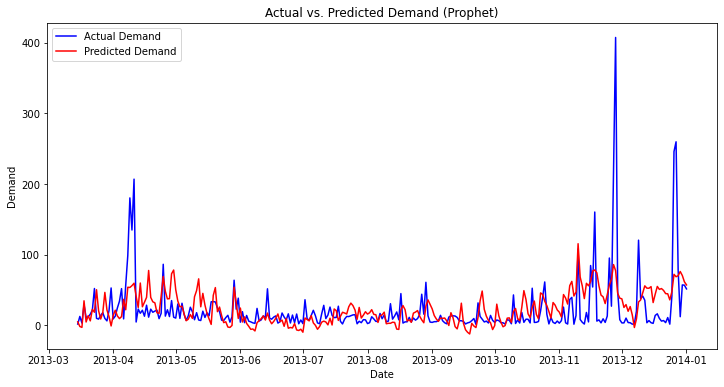

In [32]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('weather.csv', index_col='date', parse_dates=True)
df = df[['Wind', 'Temperature', 'Humidity']]

# Create a lagged version of the demand variable to use as features
df['Wind_lagged'] = df['Wind'].shift()

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Fill missing values with 1 (alternatively, you can use other methods to handle missing values)
train = train.fillna(1)
test = test.fillna(1)

# Prepare the DataFrame for Prophet
train_prophet = train.reset_index()
train_prophet.rename(columns={'date': 'ds', 'Wind': 'y'}, inplace=True)

# Train the Prophet model
prophet_model = Prophet()
prophet_model.add_regressor('Temperature')
prophet_model.add_regressor('Humidity')
prophet_model.fit(train_prophet)

# Make future predictions for the test set
test_prophet = test.reset_index()
test_prophet.rename(columns={'date': 'ds', 'Wind': 'y'}, inplace=True)
test_prophet['Temperature'] = test['Temperature'].values
test_prophet['Humidity'] = test['Humidity'].values

forecast = prophet_model.predict(test_prophet)

# Extracting the actual and predicted values
actual_values = test['Wind'].values
predicted_values = forecast['yhat'].values

# Plot the actual values and the predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, actual_values, label='Actual Demand', color='blue')
plt.plot(test.index, predicted_values, label='Predicted Demand', color='red')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.title('Actual vs. Predicted Demand (Prophet)')
plt.legend()
plt.show()


In [34]:
# Calculate the evaluation metrics
mse = mean_squared_error(test_y, predictions)
mae = mean_absolute_error(test_y, predictions)
r2 = r2_score(test_y, predictions)
rmse = np.sqrt(mse)


print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared (R2):', r2)
print('Root Mean Squared Error:', rmse)


Mean Squared Error: 1278.2517823425105
Mean Absolute Error: 18.25210858867453
R-squared (R2): 0.2360582977160014
Root Mean Squared Error: 35.75264720747976


# Computational Complexity Analysis

13:38:29 - cmdstanpy - INFO - Chain [1] start processing
13:38:29 - cmdstanpy - INFO - Chain [1] done processing


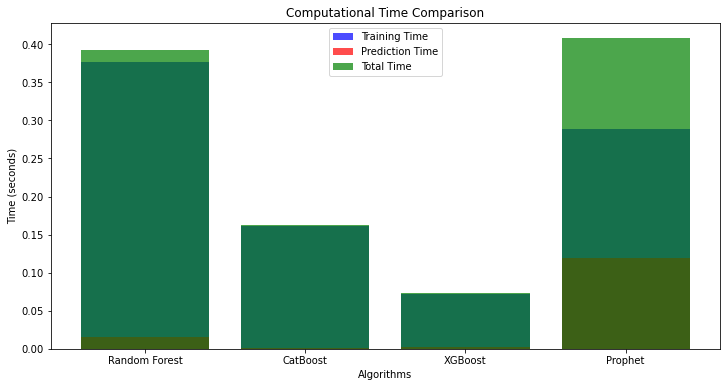

Random Forest - Training Time: 0.3770 seconds
Random Forest - Prediction Time: 0.0150 seconds
Random Forest - Total Time: 0.3920 seconds

CatBoost - Training Time: 0.1615 seconds
CatBoost - Prediction Time: 0.0010 seconds
CatBoost - Total Time: 0.1625 seconds

XGBoost - Training Time: 0.0718 seconds
XGBoost - Prediction Time: 0.0020 seconds
XGBoost - Total Time: 0.0738 seconds

Prophet - Training Time: 0.2892 seconds
Prophet - Prediction Time: 0.1187 seconds
Prophet - Total Time: 0.4079 seconds



In [35]:
# Store the algorithm names
import time
algorithm_names = ['Random Forest', 'CatBoost', 'XGBoost', 'Prophet']

# Initialize lists to store training, prediction, and total times
training_times = []
prediction_times = []
total_times = []

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
start_time = time.time()
rf_model.fit(train_X, train_y)
training_time_rf = time.time() - start_time

start_time = time.time()
rf_predictions = rf_model.predict(test_X)
prediction_time_rf = time.time() - start_time

# CatBoost
catboost_model = CatBoostRegressor(n_estimators=100, random_state=0, verbose=0)
start_time = time.time()
catboost_model.fit(train_X, train_y)
training_time_catboost = time.time() - start_time

start_time = time.time()
catboost_predictions = catboost_model.predict(test_X)
prediction_time_catboost = time.time() - start_time

# XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
start_time = time.time()
xgb_model.fit(train_X, train_y)
training_time_xgb = time.time() - start_time

start_time = time.time()
xgb_predictions = xgb_model.predict(test_X)
prediction_time_xgb = time.time() - start_time

# Prophet
train_prophet = train[['Wind']].reset_index()
train_prophet.rename(columns={'date': 'ds', 'Wind': 'y'}, inplace=True)

prophet_model = Prophet()
start_time = time.time()
prophet_model.fit(train_prophet)
training_time_prophet = time.time() - start_time

test_prophet = test[['Wind']].reset_index()
test_prophet.rename(columns={'date': 'ds', 'Wind': 'y'}, inplace=True)
test_prophet['Temperature'] = test['Temperature'].values
test_prophet['Humidity'] = test['Humidity'].values

start_time = time.time()
forecast = prophet_model.predict(test_prophet)
prophet_predictions = forecast['yhat'].values
prediction_time_prophet = time.time() - start_time

# Calculate total times
total_time_rf = training_time_rf + prediction_time_rf
total_time_catboost = training_time_catboost + prediction_time_catboost
total_time_xgb = training_time_xgb + prediction_time_xgb
total_time_prophet = training_time_prophet + prediction_time_prophet

# Store times in lists
training_times = [training_time_rf, training_time_catboost, training_time_xgb, training_time_prophet]
prediction_times = [prediction_time_rf, prediction_time_catboost, prediction_time_xgb, prediction_time_prophet]
total_times = [total_time_rf, total_time_catboost, total_time_xgb, total_time_prophet]

# Create a bar plot to visualize the training, prediction, and total times
plt.figure(figsize=(12, 6))
plt.bar(algorithm_names, training_times, label='Training Time', color='blue', alpha=0.7)
plt.bar(algorithm_names, prediction_times, label='Prediction Time', color='red', alpha=0.7)
plt.bar(algorithm_names, total_times, label='Total Time', color='green', alpha=0.7)
plt.xlabel('Algorithms')
plt.ylabel('Time (seconds)')
plt.title('Computational Time Comparison')
plt.legend()
plt.show()

# Print the values
for i, algorithm in enumerate(algorithm_names):
    print(f'{algorithm} - Training Time: {training_times[i]:.4f} seconds')
    print(f'{algorithm} - Prediction Time: {prediction_times[i]:.4f} seconds')
    print(f'{algorithm} - Total Time: {total_times[i]:.4f} seconds')
    print()
